In [47]:
import matplotlib.pyplot as plt
import cv2
import numpy as np 
import pandas as pd 
import os
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input

import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!unzip '/content/drive/MyDrive/BlackWhite/dataset.zip' -d '/content/'

#Loading Data

In [10]:
gray_images = np.load('/content/dataset/gray/val.npy')
ab_images = np.load('/content/dataset/abs/val1.npy')

def image_pipeline(gray_scale_imgs, batch_size = 100, preprocess_f = preprocess_input):
    imgs = np.zeros((batch_size, 224, 224, 3))
    for i in range(0, 3):
        imgs[:batch_size, :, :,i] = gray_scale_imgs[:batch_size]
    return preprocess_f(imgs)

input_images = image_pipeline(gray_images, batch_size = 300)

In [11]:
def col_from_abs(gray_imgs, ab_imgs, n = 10):
    imgs = np.zeros((n, 224, 224, 3))
    imgs[:, :, :, 0] = gray_imgs[0:n:]
    imgs[:, :, :, 1:] = ab_imgs[0:n:]
    imgs = imgs.astype("uint8")
    imgs_ = []
    for i in range(0, n):
        imgs_.append(cv2.cvtColor(imgs[i], cv2.COLOR_LAB2RGB))

    imgs_ = np.array(imgs_)
    return imgs_

output_images = preprocess_input(col_from_abs(gray_imgs = gray_images, ab_imgs = ab_images, n = 300))

#Input Images

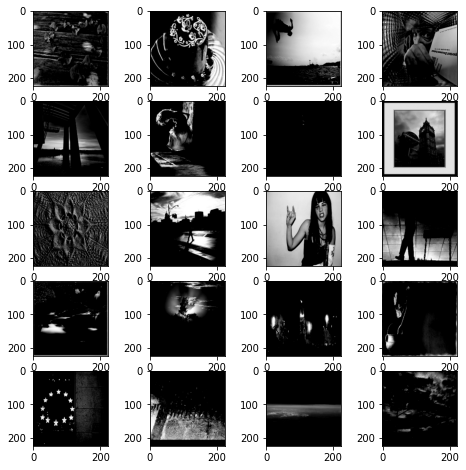

In [51]:
w = 10
h = 10
fig = plt.figure(figsize=(8, 8))
columns = 4
rows = 5
for i in range(1, columns*rows +1):
    img = input_images[i]
    fig.add_subplot(rows, columns, i)
    plt.imshow(img)
plt.show()

#Defining the model

In [70]:
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2, decode_predictions, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.nn import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Conv2DTranspose, Reshape
from tensorflow.keras.initializers import RandomUniform
from tensorflow.compat.v1.losses import mean_pairwise_squared_error

rcnn_model = Sequential()
rcnn_model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = relu))
rcnn_model.add(Conv2D(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = relu))
rcnn_model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 12, use_bias = True, bias_initializer = RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = relu))
rcnn_model.add(Conv2DTranspose(strides = 1, kernel_size = 3, filters = 3, use_bias = True, bias_initializer = RandomUniform(minval=-0.05, maxval=0.05) , padding = "valid", activation = relu))
rcnn_model.compile(optimizer = Adam(epsilon = 1e-8), loss = mean_pairwise_squared_error)

In [71]:
history = rcnn_model.fit(input_images, output_images, epochs=20, batch_size=16)

Epoch 1/20
19/19 [==============================] - 2s 35ms/step - loss: 5.9178
Epoch 2/20
19/19 [==============================] - 1s 29ms/step - loss: 4.0390
Epoch 3/20
19/19 [==============================] - 1s 29ms/step - loss: 2.5095
Epoch 4/20
19/19 [==============================] - 1s 30ms/step - loss: 2.0241
Epoch 5/20
19/19 [==============================] - 1s 29ms/step - loss: 1.9050
Epoch 6/20
19/19 [==============================] - 1s 30ms/step - loss: 1.8555
Epoch 7/20
19/19 [==============================] - 1s 37ms/step - loss: 1.8271
Epoch 8/20
19/19 [==============================] - 1s 39ms/step - loss: 1.7950
Epoch 9/20
19/19 [==============================] - 1s 37ms/step - loss: 1.7782
Epoch 10/20
19/19 [==============================] - 1s 33ms/step - loss: 1.7418
Epoch 11/20
19/19 [==============================] - 1s 30ms/step - loss: 1.7298
Epoch 12/20
19/19 [==============================] - 1s 29ms/step - loss: 1.7270
Epoch 13/20
19/19 [==================

In [49]:
pred_outs = rcnn_model.predict(input_images)

10/10 [==============================] - 0s 26ms/step


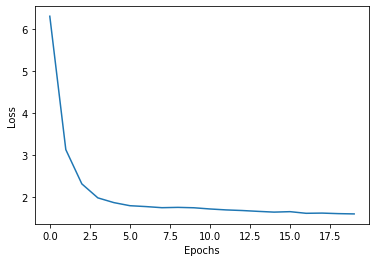

In [56]:
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(history.history['loss'])
plt.show()

In [57]:
acc_ = np.array([100-i for i in history.history['loss']])

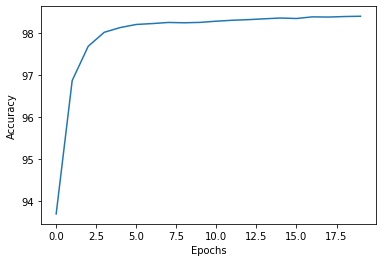

In [59]:
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.plot(acc_)
plt.show()